## importing rebekah's files

-> can use pip install within terminal to download packages <br>
-> everything rebekah made needs to be in folder c567 in order to move over into this code <br> 
-> make sure you open the whole folder first before opening this document <br>

In [29]:
import os

import analysis_plotting_helper_functions_c3v3 as helper
import session_processing_helper_c5v2 as processing_helper
import analysis_utils as utils
import utils_c5v2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

#### setting working directory, initializing folders and such

In [30]:
data_dir = '/Users/rebekahzhang/data/behavior_data'
exp = "exp2"
cohort = "c567"
data_folder = os.path.join(data_dir, exp, cohort)
figure_folder = os.path.join(data_dir, exp, f'{cohort}_figures')
print(data_folder)
print(figure_folder)

/Users/rebekahzhang/data/behavior_data/exp2/c567
/Users/rebekahzhang/data/behavior_data/exp2/c567_figures


In [31]:
two_colors = ["#ffb400", "#9080ff"]
custom_palette = {'s': two_colors[0], 'l': two_colors[1]}

In [32]:
weight_log = pd.read_csv(os.path.join(data_folder, "stitchedfile_c567.csv"), index_col=0)

In [33]:
weight_log_not_na = weight_log.loc[weight_log['X..weight']>50].copy()

In [34]:
weight_log_exp2 = weight_log_not_na.loc[weight_log_not_na['exp']==2]

Text(26.357486979166673, 0.5, 'TW')

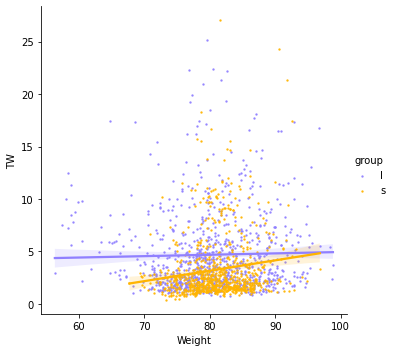

In [40]:
sns.lmplot(
    data=weight_log_exp2,
    x='X..weight',
    y='avg_tw',
    hue='group',
    palette=custom_palette,
    scatter_kws={"s": 2}
)

plt.xlabel('Weight')
plt.ylabel('TW')

Text(0.5, 0, 'Group')

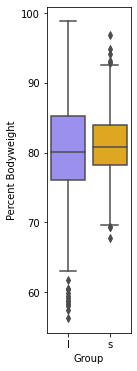

In [42]:
plt.figure(figsize=(1.5, 6))
sns.boxplot(data=weight_log_exp2, x="group", y='X..weight', palette=custom_palette)
plt.ylabel("Percent Bodyweight")
plt.xlabel("Group")
# plt.savefig(f'{figure_folder}/{"tw_box"}.png', bbox_inches='tight')

In [44]:
bw_short = weight_log_exp2.loc[weight_log.group=="s", "X..weight"]
bw_long = weight_log_exp2.loc[weight_log.group=="l", "X..weight"]

In [45]:
t_stat, p_value = stats.ttest_ind(bw_short, bw_long, equal_var=False)
print(f"Welch's t-test: t = {t_stat:.3f}, p = {p_value:.4f}")

Welch's t-test: t = 2.563, p = 0.0105


### making the colors and stuff so everything is consistent

-> two colors is purple and yellow <br>
-> short should always be yellow, long purple

In [72]:
# two_colors = plt.cm.viridis(np.linspace(0, 1, 2))
two_colors = ["#ffb400", "#9080ff"]
custom_palette = {'s': two_colors[0], 'l': two_colors[1]}

colors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00"]

/var/folders/c7/rpkl0rts1k5c1_wjj8_0d3300000gn/T/ipykernel_14067/2689998170.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  longcolors = plt.cm.get_cmap('tab10', len(mouse_list))


### loading in session logs

-> sessions_training is the combined log of both weights and recording that i made within r studio <br> ***need to transfer that code into python!***

In [138]:
# differentiate mice by cohort, making sure we only select mice in these cohorts
cohort5 = ["RZ034", "RZ035", "RZ036", "RZ037", "RZ038", "RZ039", "RZ040", "RZ041", "RZ042", "RZ043", "RZ044", "RZ045"]
cohort6 = ["RZ047", "RZ048", "RZ049", "RZ050", "RZ051", "RZ052", "RZ053", "RZ054", "RZ055", "RZ056"]
cohort7 = ["RZ057", "RZ058", "RZ059", "RZ060", "RZ061", "RZ062", "RZ063", "RZ064", "RZ065", "RZ066", "RZ067", "RZ068", 
           "RZ069", "RZ070", "RZ071", "RZ072"]
# combine into c567 when we want to analyze all mice together
c567 = cohort5 + cohort6 + cohort7

longcolors = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00", "#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00", "#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00", "#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00", "#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00", "#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00", "#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00", "#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00", "#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00", "#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", 
          "#beb9db", "#fdcce5", "#8bd3c7", "#96c3d6", "#c4d7a7", "#d1b9d9",
          "#ffcc00"]

38


##### stitching files together python edition

In [128]:
# set working directory to data_dir we set above
os.chdir(data_folder)
# read CSV file
training_log = pd.read_csv("TrainingLog_AllCohorts.csv")
# rename columns to be consistent with sessions catalog from rebekah, select only relevant columns
training_log = training_log.rename(columns={"Date": "date", "Mouse": "mouse", "% weight": "percent_bw", "Pre": "pre_bw", "Post": "post_bw"})
training_log["Initial"] = pd.to_numeric(training_log["Initial"], errors='coerce')
training_log["pre_bw"] = pd.to_numeric(training_log["pre_bw"], errors='coerce')
training_log["percent_bw"] = pd.to_numeric(training_log["percent_bw"], errors='coerce')
training_log["percent_bw"] = training_log["percent_bw"].replace(0, pd.NA)
training_log["post_bw"] = pd.to_numeric(training_log["post_bw"], errors='coerce')
training_log["pre_percent_bw"] = training_log["pre_bw"] / training_log["Initial"] * 100
training_log["pre_percent_bw"] = training_log["pre_percent_bw"].round(1)
training_log = training_log[["date", "mouse", "pre_percent_bw", "pre_bw", "percent_bw", "post_bw"]]
# select only mice in cohorts 5 6 and 7 
training_log_c567 = training_log[training_log["mouse"].isin(c567)]
# double check all data came over..and that its the right data
training_log_c567.head()

print(training_log["mouse"]="RZ054")

,date,mouse,pre_percent_bw,pre_bw,percent_bw,post_bw
0,2025-03-21,RZ059,81.5,24.95,81.9,25.07
1,2025-03-20,RZ059,81.4,24.92,83.6,25.59
2,2025-03-19,RZ059,80.9,24.77,83.1,25.42
3,2025-03-18,RZ059,80.6,24.65,82.4,25.21
4,2025-03-17,RZ059,80.6,24.65,82.5,25.23


In [149]:
# read CSV
sessions_training_unedited = pd.read_csv("sessions_training.csv")
# select only mice in cohorts 5 6 and 7 
sessions_training_c567 = sessions_training_unedited[sessions_training_unedited["mouse"].isin(c567)]
# merge data
sessions_training = pd.merge(training_log_c567, sessions_training_c567, on=["date", "mouse"], how="left")
# get rid of values that don't transfer
sessions_training = sessions_training.dropna(subset=["time"])
sessions_training = sessions_training.drop(columns="Unnamed: 0")
sessions_training = sessions_training.loc[sessions_training["exp"] == 2.0]
sessions_training.head()

mouse_list = utils_c5v2.generate_mouse_list(sessions_training)
print(len(mouse_list))

29


In [177]:
# get dict with group 
group_sorted = sessions_training.groupby("group")["mouse"].apply(list).to_dict()
group_sorted= {cohort: list(set(mice)) for cohort, mice in cohort_mice.items()}
print(group_sorted)

category_colors = {'l': [colors[0]], 's': [colors[1]]}
print(category_colors)

{'l': ['RZ054', 'RZ039', 'RZ052', 'RZ066', 'RZ037', 'RZ038', 'RZ068', 'RZ058', 'RZ065', 'RZ067', 'RZ056', 'RZ057', 'RZ055', 'RZ053', 'RZ059'], 's': ['RZ061', 'RZ069', 'RZ072', 'RZ047', 'RZ051', 'RZ049', 'RZ050', 'RZ064', 'RZ063', 'RZ062', 'RZ070', 'RZ034', 'RZ036', 'RZ048']}
{'l': ['#fd7f6f'], 's': ['#7eb0d5']}


### plotting helper functions 

all stolen from rebekah. thanks rebekah

##### rebekah plot per line

In [ ]:
def plot_each_mouse_per_line(data_df, column_name, plot_name, title, x_label, y_label, 
                             figure_folder=figure_folder, mouse_list=mouse_list):
    fig = plt.figure()
    for i, mouse in enumerate(mouse_list):
        session_mouse = data_df.loc[data_df.mouse == mouse]
        plt.plot(session_mouse.session, session_mouse[column_name], color=colors[i], label=mouse)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

In [ ]:
def plot_overdays_colored_by_group(data_df, column_name, plot_name, title, x_label, y_label, 
                                   figure_folder=figure_folder, color_palette=custom_palette):
    fig = plt.figure()
    sns.lineplot(x="session",
                 y=column_name,
                 hue="group",
                 data=data_df,
                 palette=color_palette)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # plt.ylim(1,4)
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

##### mine <3

In [178]:
sessions_training.keys()

Index(['date', 'mouse', 'pre_percent_bw', 'pre_bw', 'percent_bw', 'post_bw',
       'time', 'exp', 'training', 'rig', 'pump_ul_per_turn', 'avg_tw', 'dir',
       'group', 'session', 'num_blocks', 'num_trials', 'rewards',
       'session_time', 'trainer', 'record', 'ending_code', 'cohort'],
      dtype='object')

In [186]:
sessions_training_short = sessions_training.loc[sessions_training.group=="s"]
short_list = sessions_training_short.mouse.unique().tolist()
sessions_training_long = sessions_training.loc[sessions_training.group=="l"]
long_list = sessions_training_long.mouse.unique().tolist()

long_category_colors = sns.light_palette("orange", n_colors=len(long_list))
short_category_colors = sns.dark_palette("purple", n_colors=len(short_list))


['l' 's']


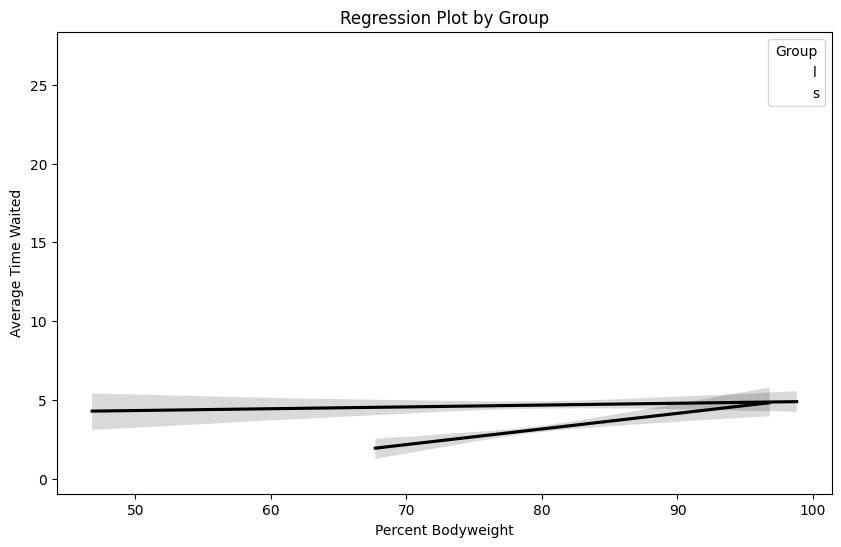

In [194]:
groups = sessions_training['group'].unique()
print(groups)

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

groups = sessions_training['group'].unique()
for group in groups:
    group_data = sessions_training[sessions_training['group'] == group].dropna(subset=['percent_bw', 'avg_tw'])
    group_data["percent_bw"] = pd.to_numeric(group_data["percent_bw"], errors='coerce')
    group_data["avg_tw"] = pd.to_numeric(group_data["avg_tw"], errors='coerce')
    
    # Use sns.regplot to plot the regression for each group
    sns.regplot(x="percent_bw", y="avg_tw", data=group_data, 
                scatter_kws={"s": 0},  # Small points
                line_kws={"color": "black"},  # Black regression line
                label=group)  # Add the group name to the legend

plt.xlabel("Percent Bodyweight")
plt.ylabel("Average Time Waited")
plt.title("Regression Plot by Group")
plt.legend(title='Group')
plt.show()

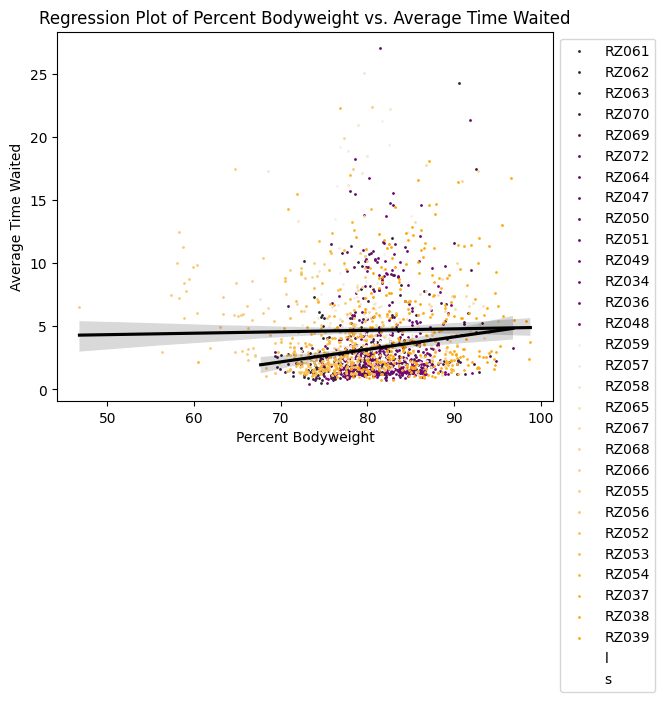

In [195]:
fig = plt.figure()
for i, mouse in enumerate(short_list):
        session_mouse = sessions_training.loc[sessions_training.mouse == mouse]
        session_mouse = session_mouse.dropna(subset=['percent_bw', 'avg_tw'])
        session_mouse["percent_bw"] = pd.to_numeric(session_mouse["percent_bw"], errors='coerce')
        session_mouse["avg_tw"] = pd.to_numeric(session_mouse["avg_tw"], errors='coerce')
        plt.scatter(session_mouse["percent_bw"], session_mouse["avg_tw"], color=short_category_colors[i], label=mouse, s=1)

for i, mouse in enumerate(long_list):
        session_mouse = sessions_training.loc[sessions_training.mouse == mouse]
        session_mouse = session_mouse.dropna(subset=['percent_bw', 'avg_tw'])
        session_mouse["percent_bw"] = pd.to_numeric(session_mouse["percent_bw"], errors='coerce')
        session_mouse["avg_tw"] = pd.to_numeric(session_mouse["avg_tw"], errors='coerce')
        plt.scatter(session_mouse["percent_bw"], session_mouse["avg_tw"], color=long_category_colors[i], label=mouse, s=1)

groups = sessions_training['group'].unique()
for group in groups:
    group_data = sessions_training[sessions_training['group'] == group].dropna(subset=['percent_bw', 'avg_tw'])
    group_data["percent_bw"] = pd.to_numeric(group_data["percent_bw"], errors='coerce')
    group_data["avg_tw"] = pd.to_numeric(group_data["avg_tw"], errors='coerce')
    
    # Use sns.regplot to plot the regression for each group
    sns.regplot(x="percent_bw", y="avg_tw", data=group_data, 
                scatter_kws={"s": 0},  # Small points
                line_kws={"color": "black"},  # Black regression line
                label=group)  # Add the group name to the legend

plt.xlabel("Percent Bodyweight")
plt.ylabel("Average Time Waited")
plt.title("Regression Plot of Percent Bodyweight vs. Average Time Waited")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()
#fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')


In [23]:
mouse_list = weight_log.mouse.unique().tolist()

In [24]:
palette = sns.color_palette("Spectral", n_colors=len(mouse_list)) 

KeyError: ['percent_bw']

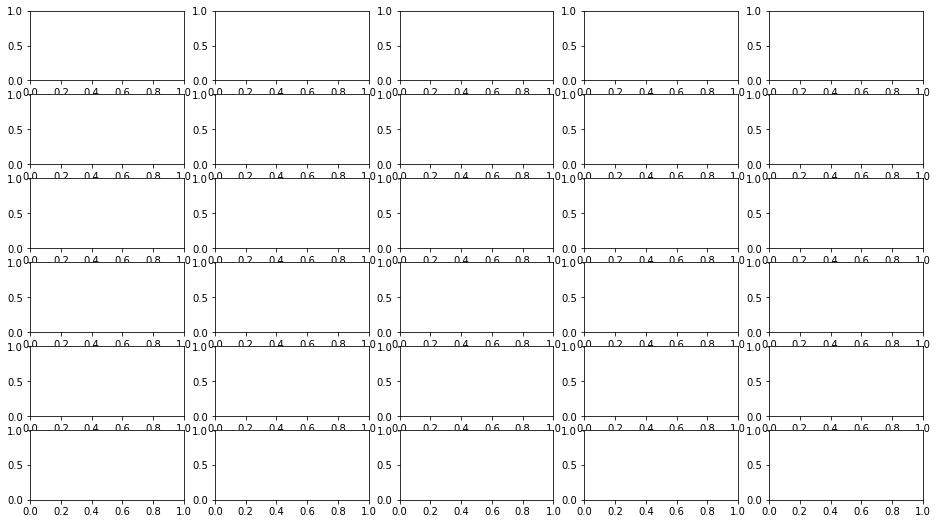

In [26]:
# create a 5x6 grid of subplots (5 rows, 6 columns)
fig, axes = plt.subplots(6, 5, figsize=(16, 9))  # Adjust figsize as necessary

# Flatten the 2D array of axes to make iteration easier
axes = axes.flatten()

for i, mouse in enumerate(mouse_list):
    # Filter the data for the current mouse and drop rows where 'percent_bw' or 'avg_tw' are NaN
    session_mouse = weight_log.loc[weight_log.mouse == mouse]
    session_mouse = session_mouse.dropna(subset=['percent_bw', 'avg_tw'])
    session_mouse["percent_bw"] = pd.to_numeric(session_mouse["percent_bw"], errors='coerce')
    session_mouse["avg_tw"] = pd.to_numeric(session_mouse["avg_tw"], errors='coerce')
    
    # Select the subplot for the current mouse
    ax = axes[i]
    
    # Plot the data on the corresponding subplot
    sns.regplot(x="percent_bw", y="avg_tw", data=session_mouse, ax=ax, scatter_kws={"color": longcolors[i]}, line_kws={"color": "black"})
    ax.set_title(mouse)  # Add the mouse name as the title for each subplot
    ax.set_xlabel("Percent Bodyweight")
    ax.set_ylabel("Average Time Waited")

    ax.set_xlim(60, 90)
    ax.set_ylim(0, 15)

# Remove the extra unused subplot (the 30th subplot) by turning it off
if len(mouse_list) < len(axes):
    for i in range(len(mouse_list), len(axes)):
        axes[i].axis('off')

# Adjust the layout to make room for the labels and titles
plt.tight_layout()
plt.show()
plot_name = "percent_bw_per_mouse_avg_tw"
fig.savefig(f'{figure_folder}/{plot_name}.png', bbox_inches='tight')

In [175]:
# Initialize empty lists to store correlation coefficients and p-values
correlation_results = []

# Iterate over the list of mice
for mouse in mouse_list:
    # Filter the data for the current mouse
    session_mouse = sessions_training.loc[sessions_training.mouse == mouse]
    
    # Convert to numeric and drop NaN values
    session_mouse["percent_bw"] = pd.to_numeric(session_mouse["percent_bw"], errors='coerce')
    session_mouse["avg_tw"] = pd.to_numeric(session_mouse["avg_tw"], errors='coerce')
    session_mouse = session_mouse.dropna(subset=["percent_bw", "avg_tw"])
    
    # Check if there are at least two data points for correlation
    if len(session_mouse) > 1:
        # Perform Pearson correlation test
        corr_coefficient, p_value = stats.pearsonr(session_mouse["percent_bw"], session_mouse["avg_tw"])
        
        # Store results
        correlation_results.append((mouse, corr_coefficient, p_value))
    else:
        correlation_results.append((mouse, None, None))  # If not enough data, store None

# Convert results to a DataFrame for easy viewing
correlation_df = pd.DataFrame(correlation_results, columns=["Mouse", "Correlation Coefficient", "P-Value"])


display(correlation_df.loc[correlation_df["P-Value"] < 0.05])


/var/folders/c7/rpkl0rts1k5c1_wjj8_0d3300000gn/T/ipykernel_14067/3123210863.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_mouse["percent_bw"] = pd.to_numeric(session_mouse["percent_bw"], errors='coerce')
/var/folders/c7/rpkl0rts1k5c1_wjj8_0d3300000gn/T/ipykernel_14067/3123210863.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_mouse["avg_tw"] = pd.to_numeric(session_mouse["avg_tw"], errors='coerce')


,Mouse,Correlation Coefficient,P-Value
1,RZ036,0.249550,0.013699
20,RZ063,0.419120,0.003365
21,RZ064,-0.418947,0.046616
22,RZ065,0.533301,0.000330


In [174]:
correlation_df.keys()

Index(['Mouse', 'Correlation Coefficient', 'P-Value'], dtype='object')

### actually plotting now

good god ignore this stuff

/Users/liannesaussy/anaconda3/envs/LUCKYCHARM/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liannesaussy/anaconda3/envs/LUCKYCHARM/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/liannesaussy/anaconda3/envs/LUCKYCHARM/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


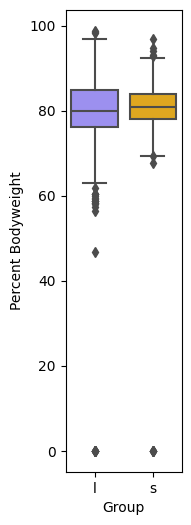

In [124]:
plt.figure(figsize=(1.5, 6))
sns.boxplot(data=sessions_training, x="group", y="percent_bw", palette=custom_palette)
plt.ylabel("Percent Bodyweight")
plt.xlabel("Group")
plt.savefig(f'{figure_folder}/{"tw_box"}.png', bbox_inches='tight')